# Importing Libraries

In [4]:
# General Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re, warnings
from datetime import datetime
from IPython.display import HTML

warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

# Loading the dataset

In [5]:

df=pd.read_csv('/kaggle/input/google-playstore-apps/Google-Playstore.csv')

In [6]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [7]:
df.shape

(2312944, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [9]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


# Preprocessing the data

In [10]:
df.Size

0           10M
1          2.9M
2          3.7M
3          1.8M
4          6.2M
           ... 
2312939     77M
2312940     44M
2312941     29M
2312942     10M
2312943    5.2M
Name: Size, Length: 2312944, dtype: object

In [11]:

temp_size=[]
for x in df.Size:
    if  pd.isna(x):
        temp_size.append(np.nan)
    elif 'G' in x:
        temp_size.append(float(re.sub('G','',x))*1000)
    elif  'M' in x:
        temp_size.append(float(re.sub('M|,','',x)))
    elif 'K' in x or 'k' in x:
        temp_size.append(float(re.sub('K|k|,','',x))/1000.0)
    else:
        temp_size.append(0)
    
df.Size = temp_size

In [12]:
df.Size

0          10.0
1           2.9
2           3.7
3           1.8
4           6.2
           ... 
2312939    77.0
2312940    44.0
2312941    29.0
2312942    10.0
2312943     5.2
Name: Size, Length: 2312944, dtype: float64

In [13]:
df.Released

0          Feb 26, 2020
1          May 21, 2020
2           Aug 9, 2019
3          Sep 10, 2018
4          Feb 21, 2020
               ...     
2312939             NaN
2312940    Jan 17, 2018
2312941    Aug 19, 2018
2312942     Aug 1, 2016
2312943     Aug 9, 2019
Name: Released, Length: 2312944, dtype: object

In [14]:
Released = []
for x in df.Released:
    if  pd.isna(x):
        Released.append(np.nan)
    else:
        Released.append(datetime.strptime(x, '%b %d, %Y'))
    
df.Released = Released

In [15]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   App Id             object        
 2   Category           object        
 3   Rating             float64       
 4   Rating Count       float64       
 5   Installs           object        
 6   Minimum Installs   float64       
 7   Maximum Installs   int64         
 8   Free               bool          
 9   Price              float64       
 10  Currency           object        
 11  Size               float64       
 12  Minimum Android    object        
 13  Developer Id       object        
 14  Developer Website  object        
 15  Developer Email    object        
 16  Released           datetime64[ns]
 17  Last Updated       datetime64[ns]
 18  Content Rating     object        
 19  Privacy Policy     object        
 20  Ad Supported       bool 

# Extracting Insights

## The first 20 Category App

In [17]:
pie_data = df.Category.value_counts()

In [18]:
graph_data = pie_data[:19]
graph_data["Others"] = pie_data[20:].sum()

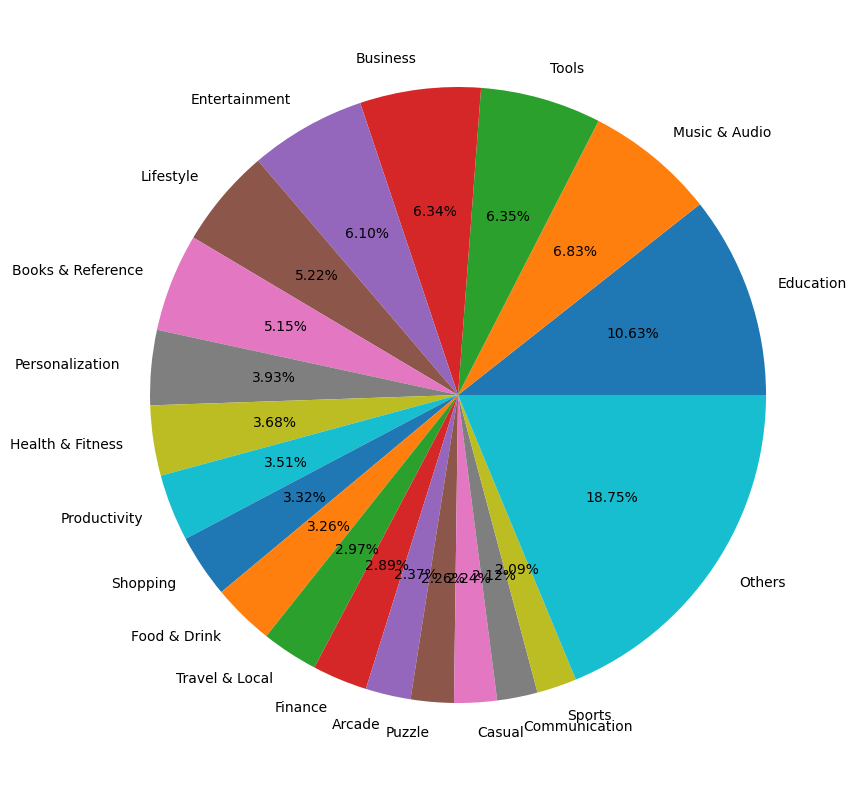

In [19]:
plt.pie(graph_data.values, labels=graph_data.keys(), autopct='%1.2f%%')
plt.show()

## Free vs Paid

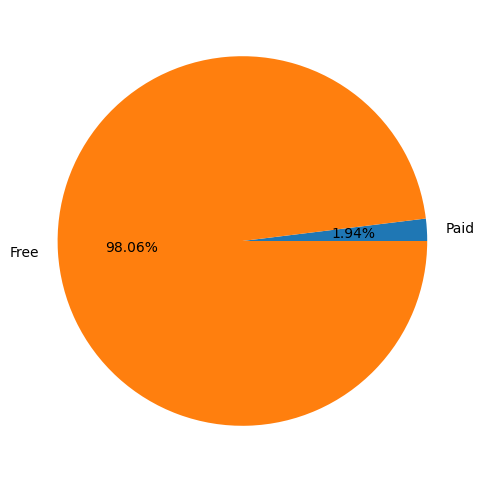

In [20]:
paid_free_data = {
    "Paid": df.Price[df.Price > 0].count(),
    "Free": df.Price[df.Price == 0].count()
}
plt.figure(figsize=(6,6))
plt.pie(paid_free_data.values(), labels=paid_free_data.keys(), autopct='%1.2f%%')
plt.show()

## Distribution of Ratings for Free and Paid Apps

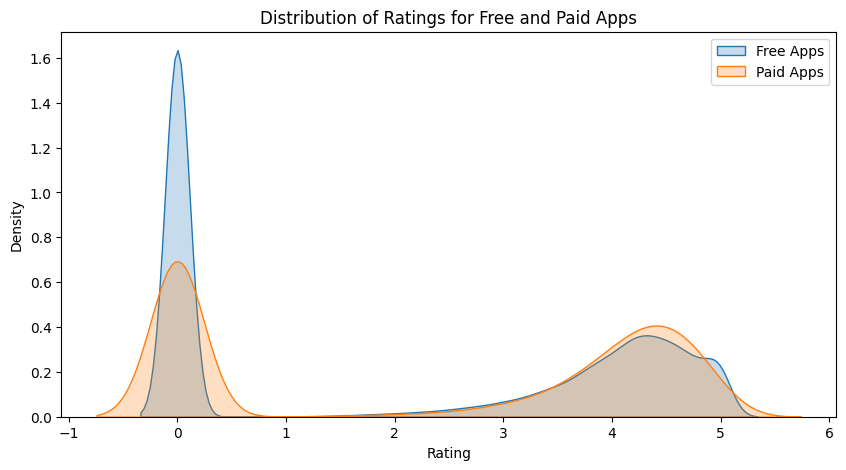

In [21]:
#Visualize the distribution of ratings for free and paid apps
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df[df['Free'] == True]['Rating'], label='Free Apps', fill=True)
sns.kdeplot(data=df[df['Free'] == False]['Rating'], label='Paid Apps', fill=True)
plt.title('Distribution of Ratings for Free and Paid Apps')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()


## Add Supported App

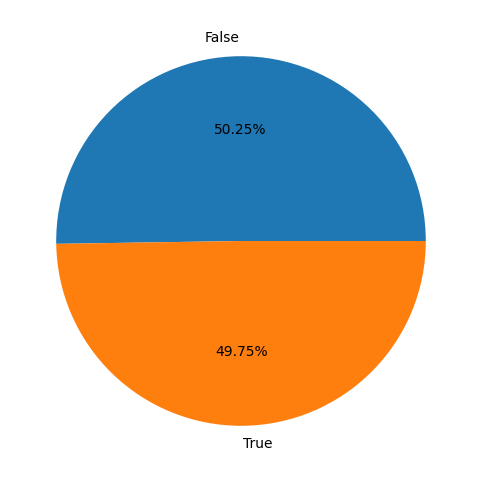

In [22]:
ad_supported=df["Ad Supported"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(ad_supported.values, labels=ad_supported.keys(), autopct='%1.2f%%')
plt.show()

## Purchase Option in App

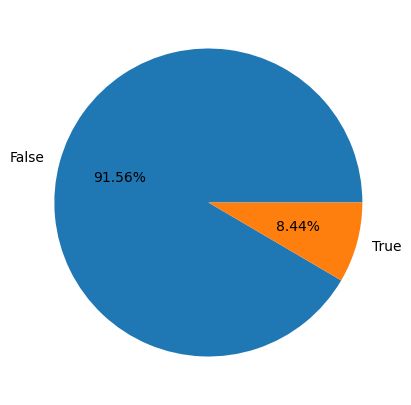

In [23]:
app_purchase = df["In App Purchases"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(app_purchase.values, labels=app_purchase.keys(), autopct='%1.2f%%')
plt.show()

## Top 10 Minimum Android version

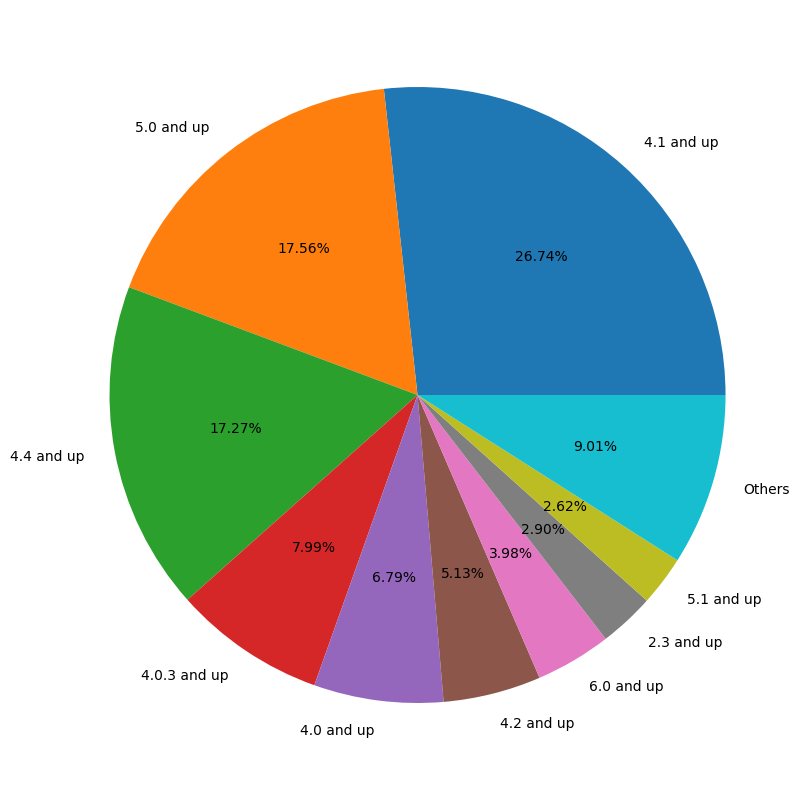

In [24]:
android_version = df["Minimum Android"].value_counts()

graph_data = android_version[:9]
graph_data["Others"] = android_version[10:].sum()
plt.figure(figsize=(10,10))
plt.pie(graph_data.values, labels=graph_data.keys(), autopct='%1.2f%%')
plt.show()

## Top 10 most expensive App

In [25]:
sorted_df = df.sort_values(by=['Price'], ascending=False)


In [26]:
sorted_df2=sorted_df.set_index('App Name')

In [27]:
sorted_df2[["Category","Rating","Maximum Installs","Price"]][0:10]

,Category,Rating,Maximum Installs,Price
App Name,,,,
MESH Connect,Productivity,0.0,25,400.00
AudD,Music & Audio,3.2,4397,399.99
RichWall,Social,0.0,0,399.99
TEST EGY,Tools,0.0,0,399.99
Premium Luxury Watches - Luxury Watches Brands,Shopping,0.0,18,399.99
I'm Rich - VIP Club Limited,Business,0.0,0,399.99
Acid Reflux Treatment,Health & Fitness,0.0,1,399.99
Most expensive word game,Board,3.4,5523,399.99
Plasma duct - Premium Game,Puzzle,3.5,3369,399.99


## Top 10 Maximum Installs App Table

In [28]:
sorted_Install= df.sort_values(by=['Maximum Installs'], ascending=False)
HTML(sorted_Install[["App Name","Category","Rating","Price","Maximum Installs"]][0:10].to_html(index=False))

App Name,Category,Rating,Price,Maximum Installs
Google Play services,Tools,4.2,0.0,12057627016
YouTube,Video Players & Editors,4.4,0.0,9766230924
Google,Tools,4.2,0.0,9154248491
Google Maps - Navigate & Explore,Travel & Local,3.8,0.0,9141671889
Google Text-to-Speech,Tools,4.1,0.0,9034404884
Google Chrome: Fast & Secure,Communication,4.1,0.0,8925640788
Gmail,Communication,4.2,0.0,8756574289
Android Accessibility Suite,Tools,4.2,0.0,7408134567
Google Drive,Productivity,4.3,0.0,7028265259
Facebook,Social,2.3,0.0,6782619635


## The most Rated top 10 Category

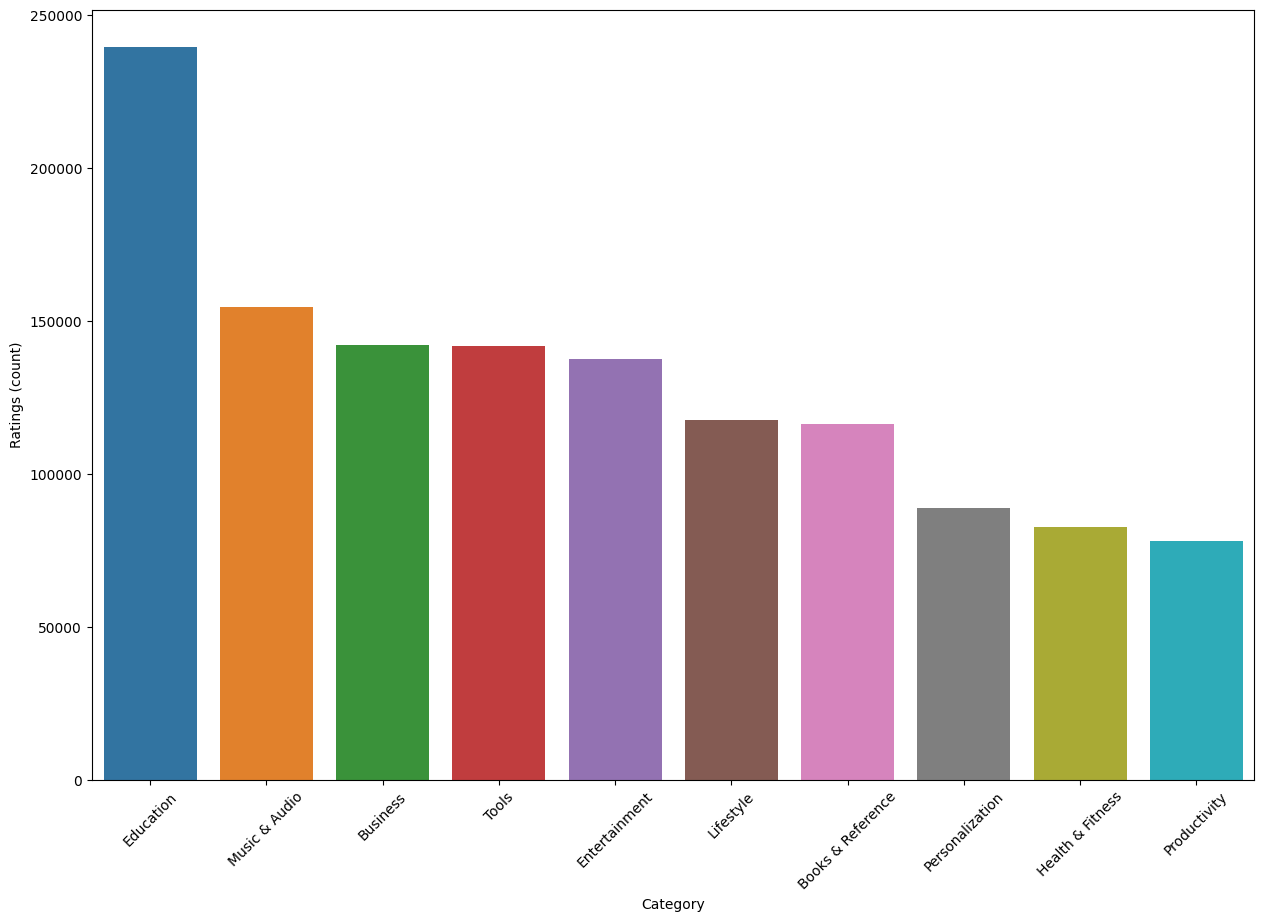

In [29]:
a = df.groupby(["Category"])["Rating"].count().sort_values(ascending=False)[:10]
ax = sns.barplot(x=a.keys(), y=a.values)
ax.tick_params(axis='x', labelrotation = 45)
ax = plt.ylabel('Ratings (count)')

## Top 10 category with Ad Supported¶

In [30]:
topTenCategoriesNames=df["Category"].value_counts()[0:10].keys()

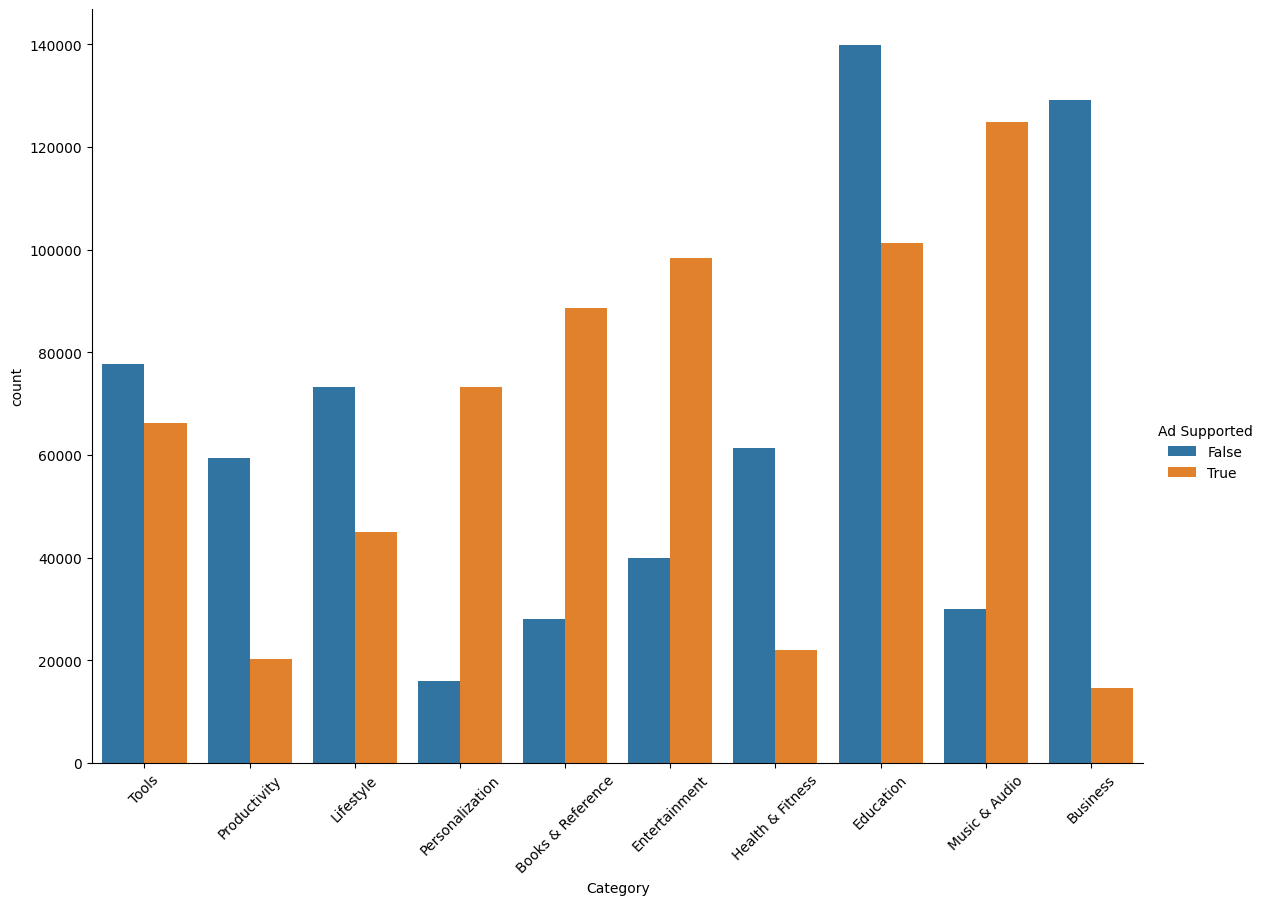

In [31]:
a = df[df.Category.isin(topTenCategoriesNames)]
ax = sns.catplot(data=a,kind="count", x="Category", hue="Ad Supported",height=8.27, aspect=11.7/8.27)
ax.set_xticklabels(rotation= 45)

## Top 10 Developer

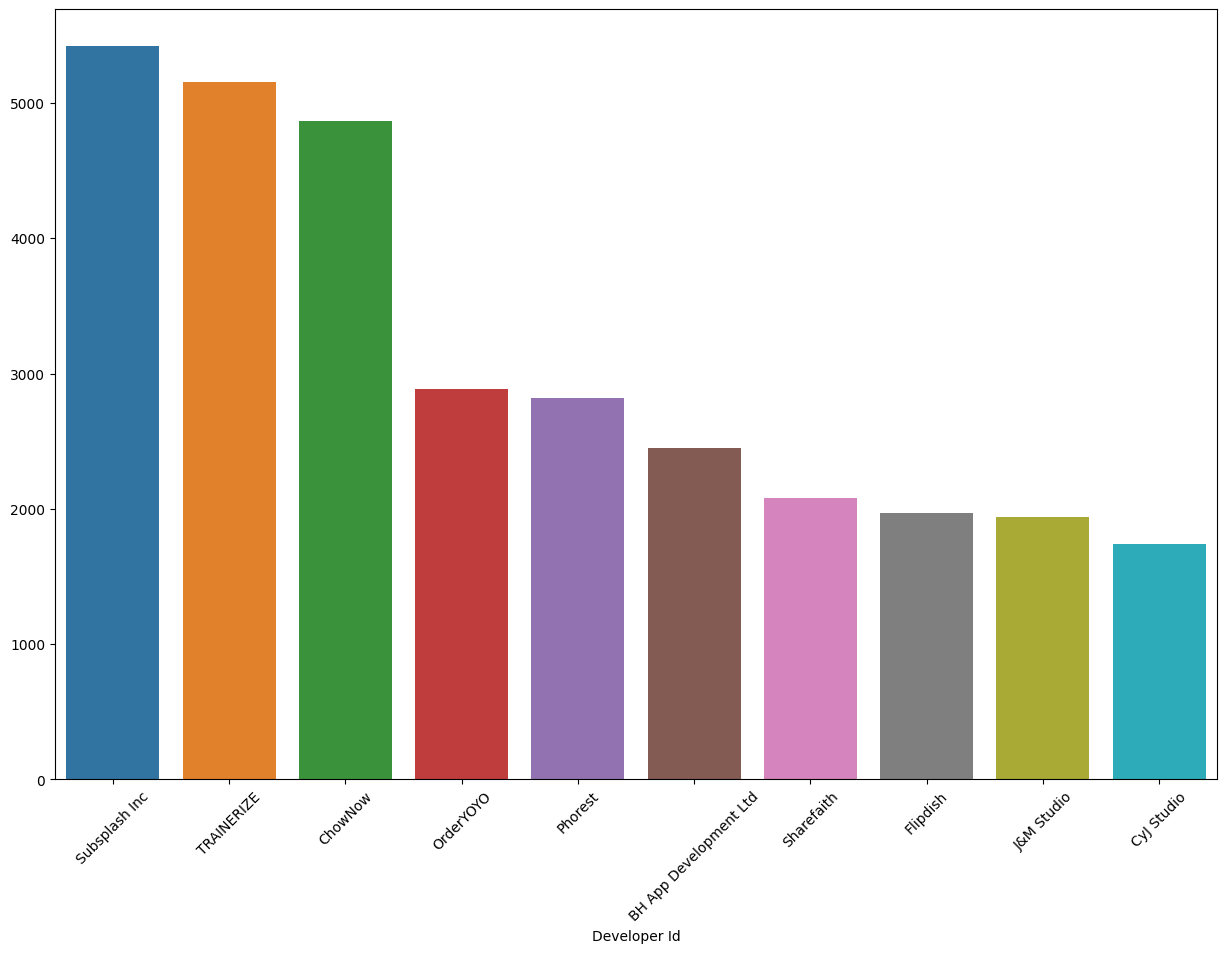

In [32]:
topTenDeveloperID= df["Developer Id"].value_counts()[0:10]
ax = sns.barplot(x=topTenDeveloperID.keys() , y=topTenDeveloperID.values)
ax.tick_params(axis='x', labelrotation = 45)

<Axes: xlabel='Price', ylabel='Rating'>

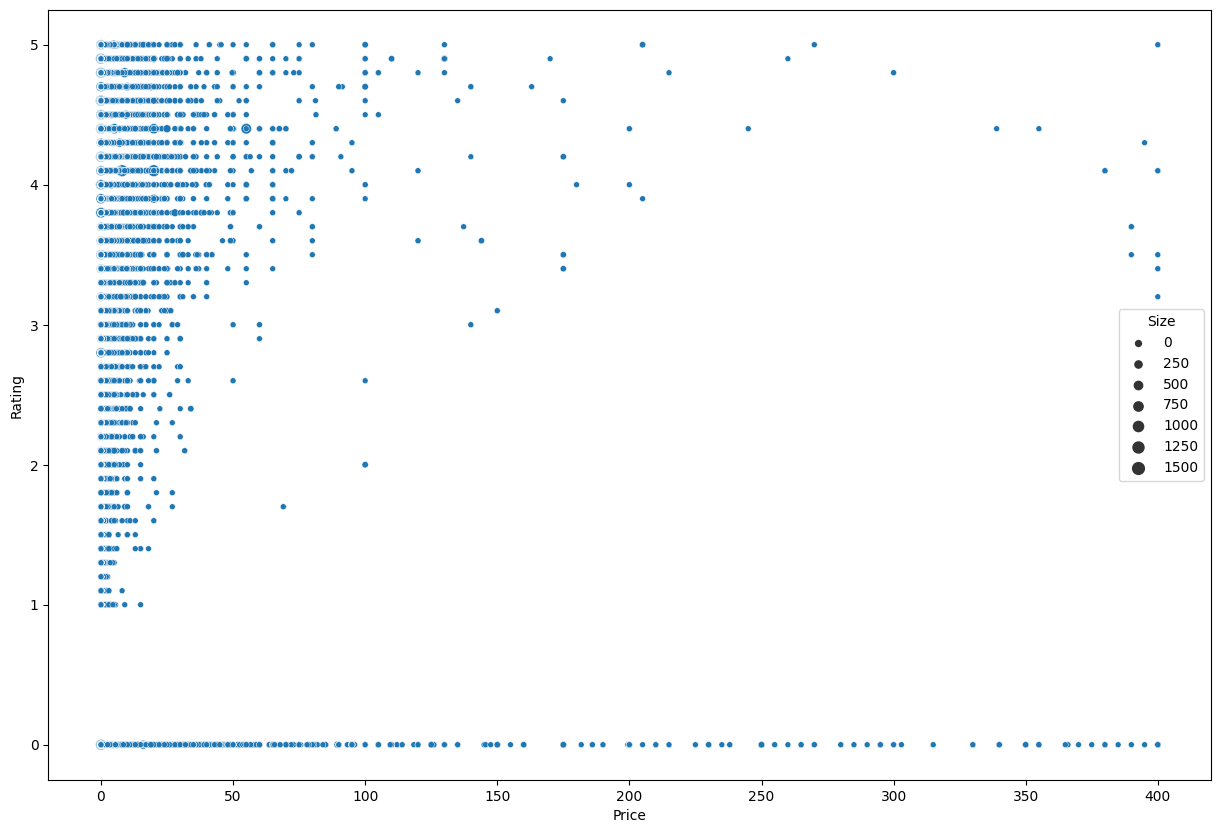

In [33]:
 sns.scatterplot( data=df, x="Price", y="Rating", size=df["Size"],)

## Abondened & Non-Abondened App before 2019

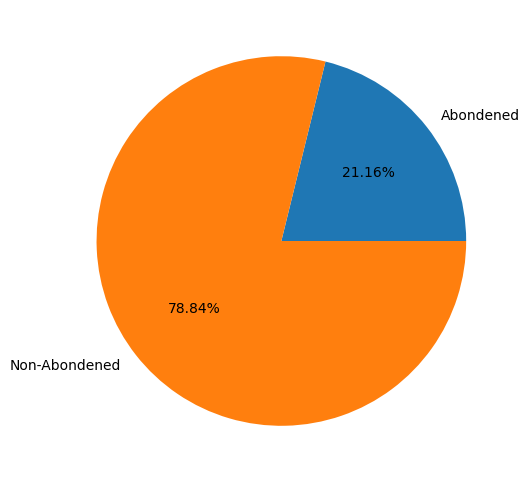

In [34]:
app = {
    "Abondened":(df[df["Last Updated"]<"2019"]).shape[0] ,
    "Non-Abondened":(df[df["Last Updated"]>="2019"]).shape[0] 
}
plt.figure(figsize=(6,6))
ax = plt.pie(app.values(), labels=app.keys(), autopct='%1.2f%%')

## Free & Paid in Abondened App

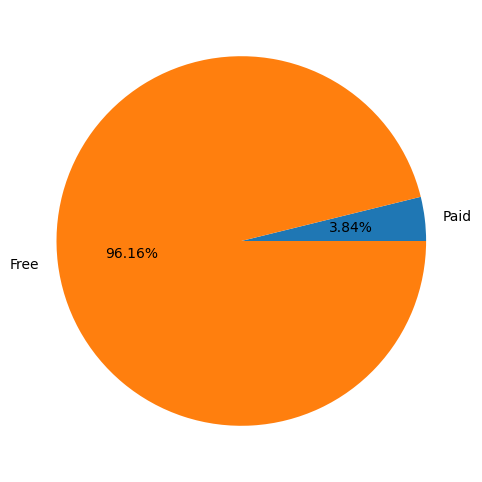

In [35]:
abondened = df[df["Last Updated"]<"2019"]

abondened_paid_free = {
    "Paid": abondened.Price[abondened.Price > 0].count(),
    "Free": abondened.Price[abondened.Price == 0].count()
}
plt.figure(figsize=(6,6))
ax = plt.pie(abondened_paid_free.values(), labels=abondened_paid_free.keys(), autopct='%1.2f%%')

## Ad Supported in Abondened App

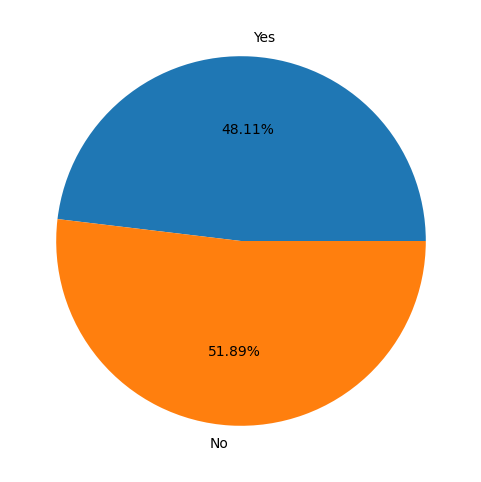

In [36]:
abondened = df[df["Last Updated"]<"2019"]

abondened_ad_supported = {
    
    "Yes": abondened["Ad Supported"][abondened["Ad Supported"] == True].count(),
    "No" : abondened["Ad Supported"][abondened["Ad Supported"] == False].count()  
}
plt.figure(figsize=(6,6))
ax = plt.pie(abondened_ad_supported.values(), labels=abondened_ad_supported.keys(), autopct='%1.2f%%')



## Number of Apps per Content Rating

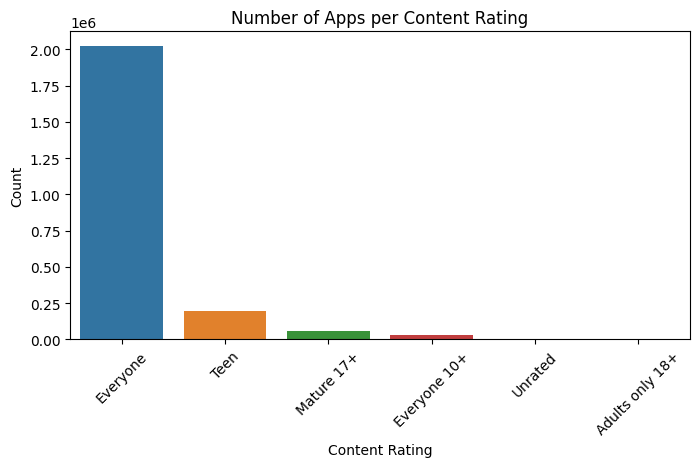

In [37]:
#Visualize the distribution of content ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='Content Rating', data=df, order=df['Content Rating'].value_counts().index)
plt.title('Number of Apps per Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Top 10 Categories with Highest Average Rating

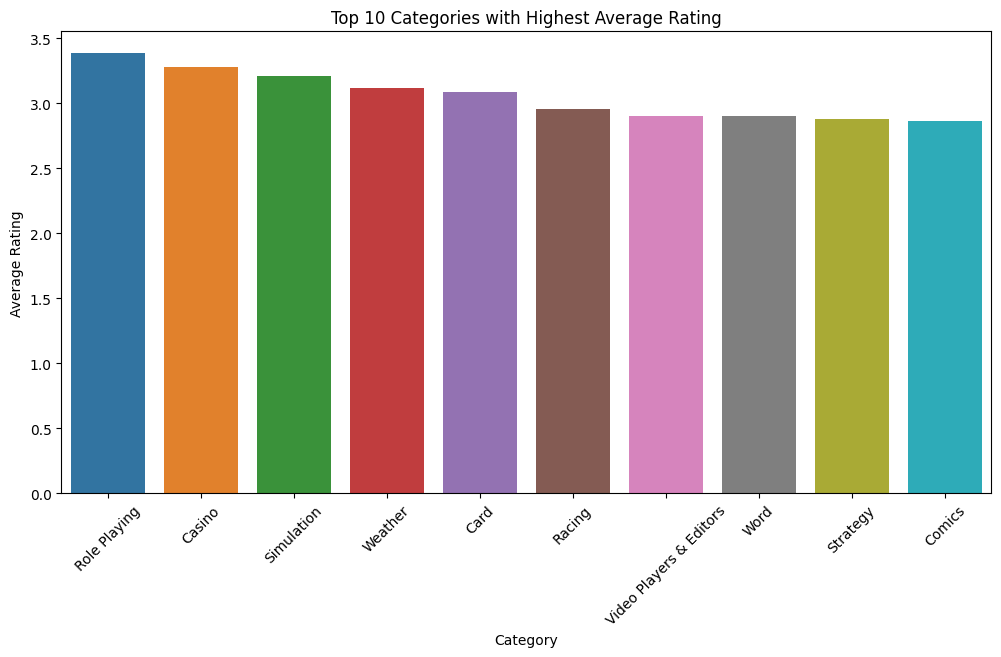

In [38]:
#Visualize the top 10 categories with the highest average rating
### What are the most popular app categories in terms of the number of apps available?
top_categories = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top 10 Categories with Highest Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


## What are the most popular app categories in terms of the number of apps available?

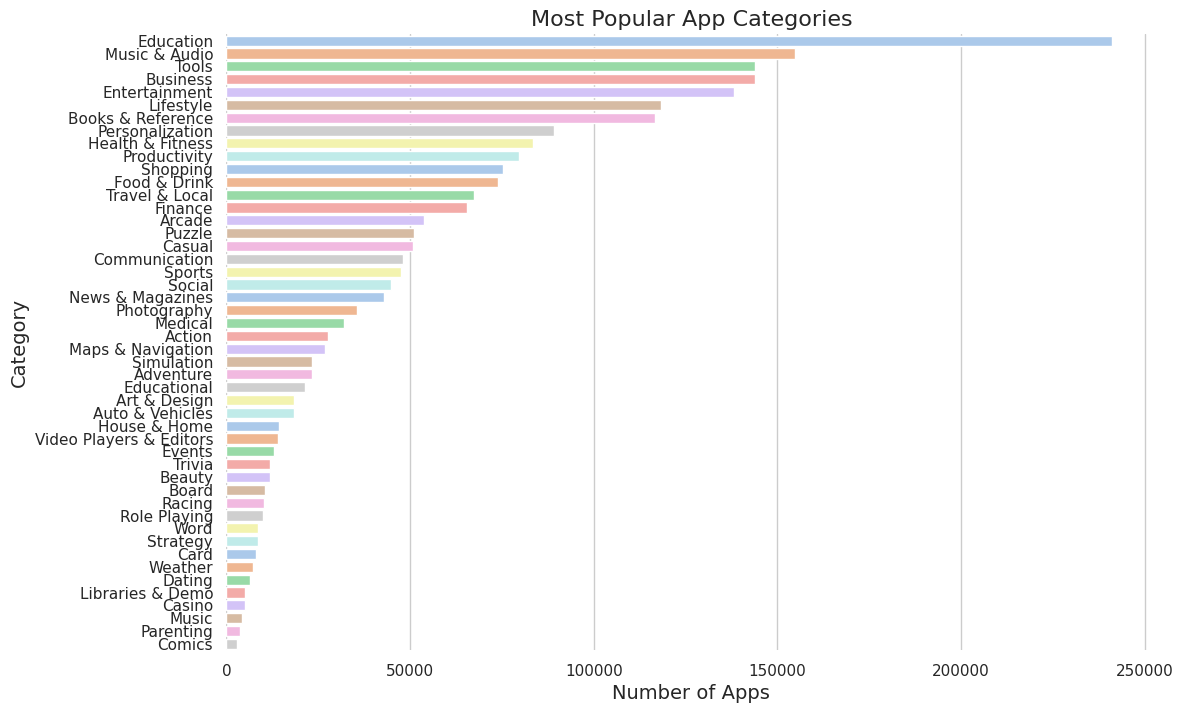

In [39]:

# Assuming the dataset is loaded as 'data'
category_counts = df['Category'].value_counts()


# Set the color palette and minimal style
sns.set(style="whitegrid", palette="pastel")

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="pastel")

# Customize the plot
plt.title('Most Popular App Categories', fontsize=16)
plt.xlabel('Number of Apps', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Remove unnecessary plot elements
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


## Which app categories have the highest number of installs?


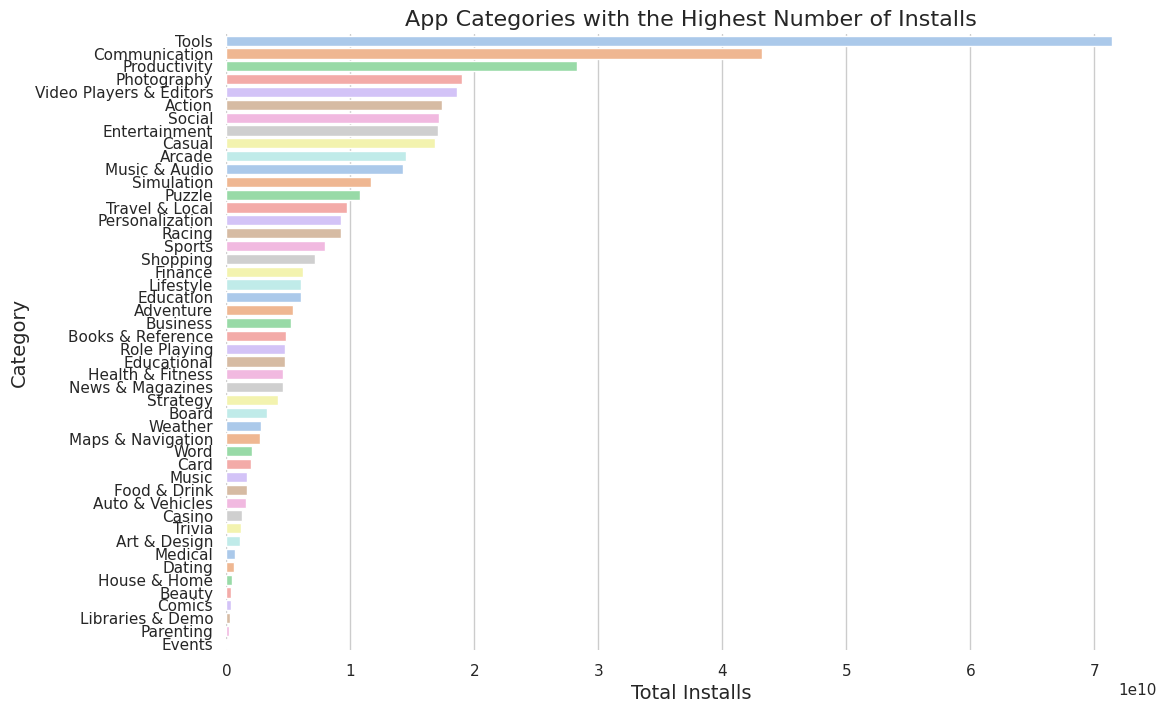

In [40]:

# Clean up the 'Installs' column
df['Installs_clean'] = df['Installs'].str.replace('[^0-9]', '', regex=True).fillna(0).astype(int)

# Calculate the total installs per category
category_installs = df.groupby('Category')['Installs_clean'].sum().sort_values(ascending=False)

# Set the color palette and minimal style
sns.set(style="whitegrid", palette="pastel")

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x=category_installs.values, y=category_installs.index, palette="pastel")

# Customize the plot
plt.title('App Categories with the Highest Number of Installs', fontsize=16)
plt.xlabel('Total Installs', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Remove unnecessary plot elements
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


## Which app developers have the most apps in the dataset, and do they have any common characteristics?

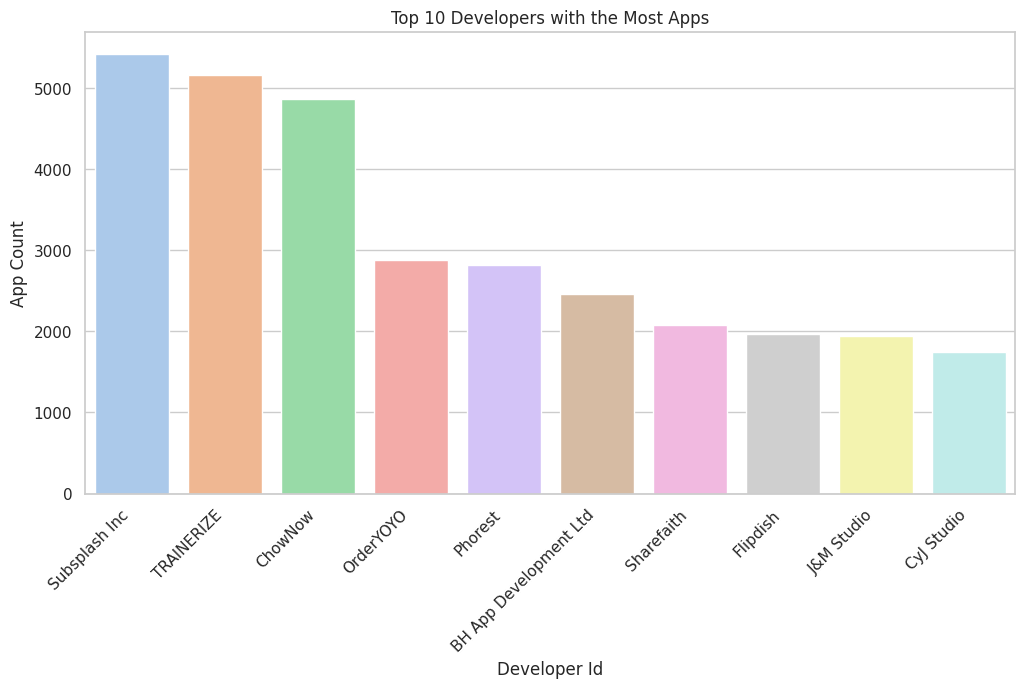

Common Characteristics for Top 10 Developers with the Most Apps:
Mean Rating: 0.38
Mean App Size (MB): 31.55
Mean Installs: 182


In [41]:
# Group the dataset by Developer Id and calculate the mean rating, app count, size, and installs for each developer
developer_stats = df.groupby('Developer Id').agg({'App Name': 'count', 'Rating': 'mean', 'Size': 'mean', 'Installs_clean': 'mean'}).rename(columns={'App Name': 'App Count'})

# Sort the results by app count in descending order
sorted_developer_stats = developer_stats.sort_values('App Count', ascending=False)

# Visualize the top 10 developers with the most apps
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_developer_stats.head(10).index, y=sorted_developer_stats.head(10)['App Count'], palette='pastel')
plt.title('Top 10 Developers with the Most Apps')
plt.xlabel('Developer Id')
plt.ylabel('App Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display common characteristics for the top 10 developers with the most apps
top_developers = sorted_developer_stats.head(10)
print("Common Characteristics for Top 10 Developers with the Most Apps:")
print("Mean Rating: {:.2f}".format(top_developers['Rating'].mean()))
print("Mean App Size (MB): {:.2f}".format(top_developers['Size'].mean()))
print("Mean Installs: {:.0f}".format(top_developers['Installs_clean'].mean()))


### Is there a relationship between the app's release date and its rating or number of installs?

Correlation between Release Date and Rating: -0.02
Correlation between Release Date and Installs: 0.01
The relationship between Release Date and Rating shows a no or negligible correlation
The relationship between Release Date and Installs shows a no or negligible correlation


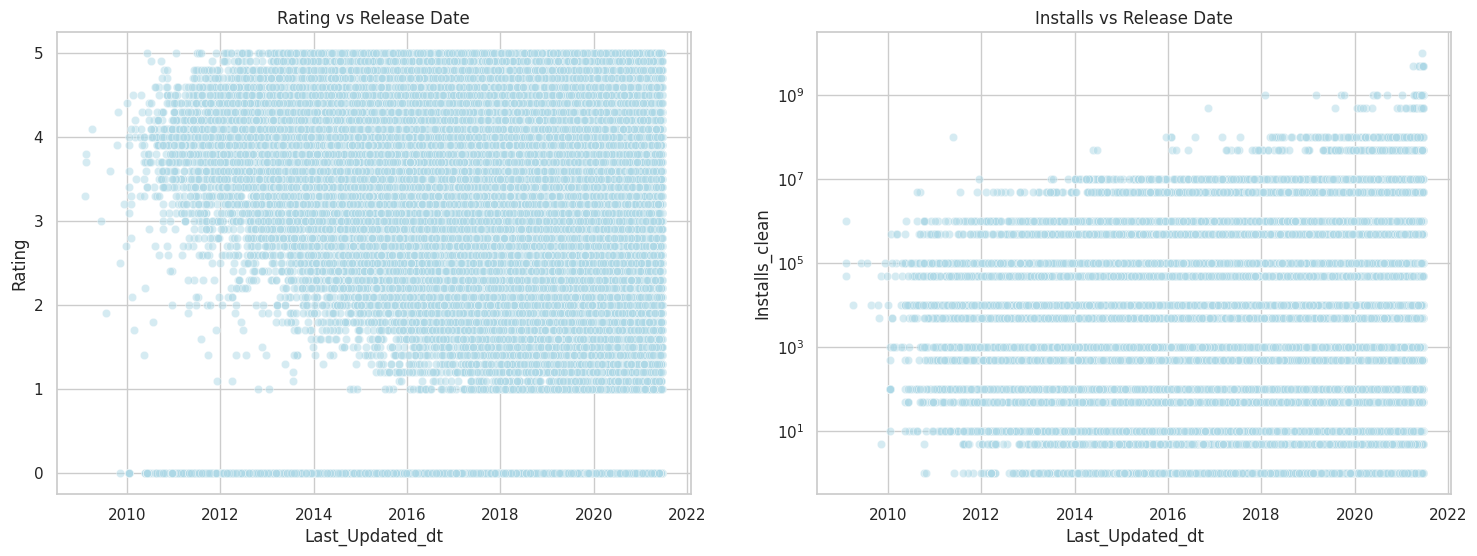

In [42]:
import matplotlib.dates as mdates

# Convert 'Last Updated' to datetime format
df['Last_Updated_dt'] = pd.to_datetime(df['Last Updated'])

# Convert datetime to the number of days since the earliest date
df['Days_Since_Updated'] = (df['Last_Updated_dt'] - df['Last_Updated_dt'].min()).dt.days

# Calculate the correlation
rating_date_corr = df['Rating'].corr(df['Days_Since_Updated'])
installs_date_corr = df['Installs_clean'].corr(df['Days_Since_Updated'])

print("Correlation between Release Date and Rating: {:.2f}".format(rating_date_corr))
print("Correlation between Release Date and Installs: {:.2f}".format(installs_date_corr))
def interpret_correlation(corr):
    if corr > 0.7:
        return "strong positive correlation"
    elif 0.5 <= corr <= 0.7:
        return "moderate positive correlation"
    elif 0.3 <= corr < 0.5:
        return "weak positive correlation"
    elif -0.3 <= corr < 0.3:
        return "no or negligible correlation"
    elif -0.5 <= corr < -0.3:
        return "weak negative correlation"
    elif -0.7 <= corr < -0.5:
        return "moderate negative correlation"
    else:
        return "strong negative correlation"

rating_corr_interpretation = interpret_correlation(rating_date_corr)
installs_corr_interpretation = interpret_correlation(installs_date_corr)

print("The relationship between Release Date and Rating shows a", rating_corr_interpretation)
print("The relationship between Release Date and Installs shows a", installs_corr_interpretation)


# Visualize the results
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data=df, x='Last_Updated_dt', y='Rating', alpha=0.5, ax=ax[0], color='lightblue')
ax[0].set_title('Rating vs Release Date')
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

sns.scatterplot(data=df, x='Last_Updated_dt', y='Installs_clean', alpha=0.5, ax=ax[1], color='lightblue')
ax[1].set_title('Installs vs Release Date')
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax[1].set_yscale("log")

plt.show()




## How does the app price affect the number of installs for paid apps?

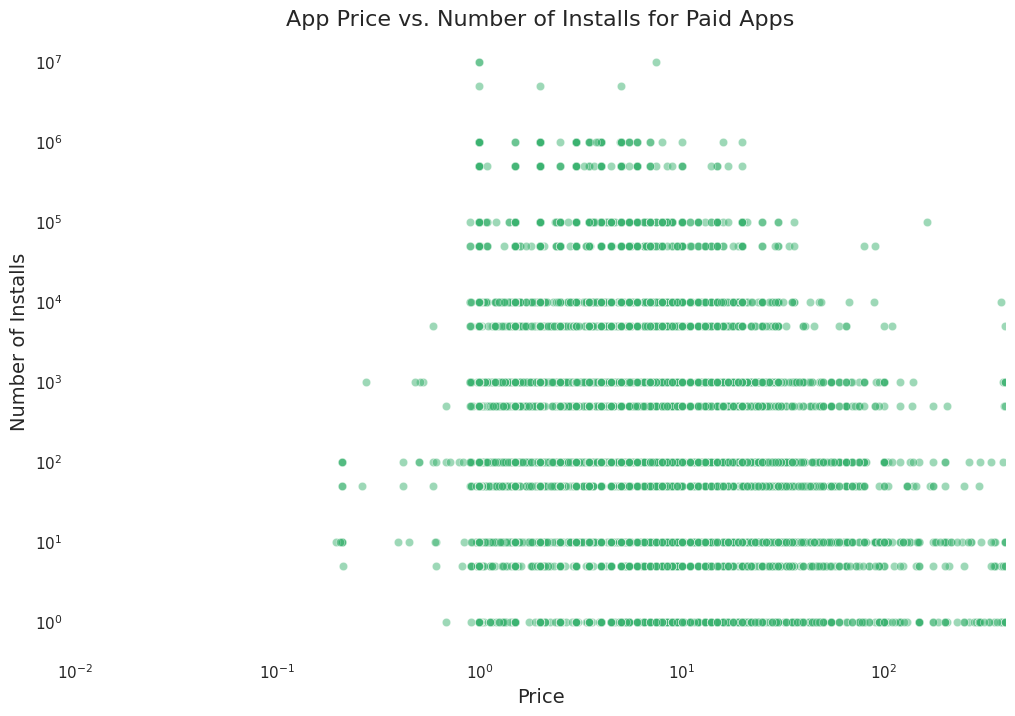

In [43]:

# Filter paid apps
paid_apps = df[(df['Free'] == False)]

# Set the color palette and minimal style
sns.set(style="white", palette="pastel")

# Create the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=paid_apps, x="Price", y="Installs_clean", alpha=0.5, color='mediumseagreen')

# Customize the plot
plt.title('App Price vs. Number of Installs for Paid Apps', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of Installs', fontsize=14)
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.01, paid_apps["Price"].max())

# Remove unnecessary plot elements
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


## What are the most common minimum Android version requirements for apps, and does it affect the number of installs?


In [44]:

# Count the frequency of each minimum Android version
min_android_counts = df['Minimum Android'].value_counts().head(10)

# Calculate the total number of installs for each minimum Android version
min_android_installs = df.groupby('Minimum Android')['Installs_clean'].sum().loc[min_android_counts.index]

# Create a DataFrame with counts and installs
min_android_df = pd.DataFrame({'Counts': min_android_counts, 'Total Installs': min_android_installs})


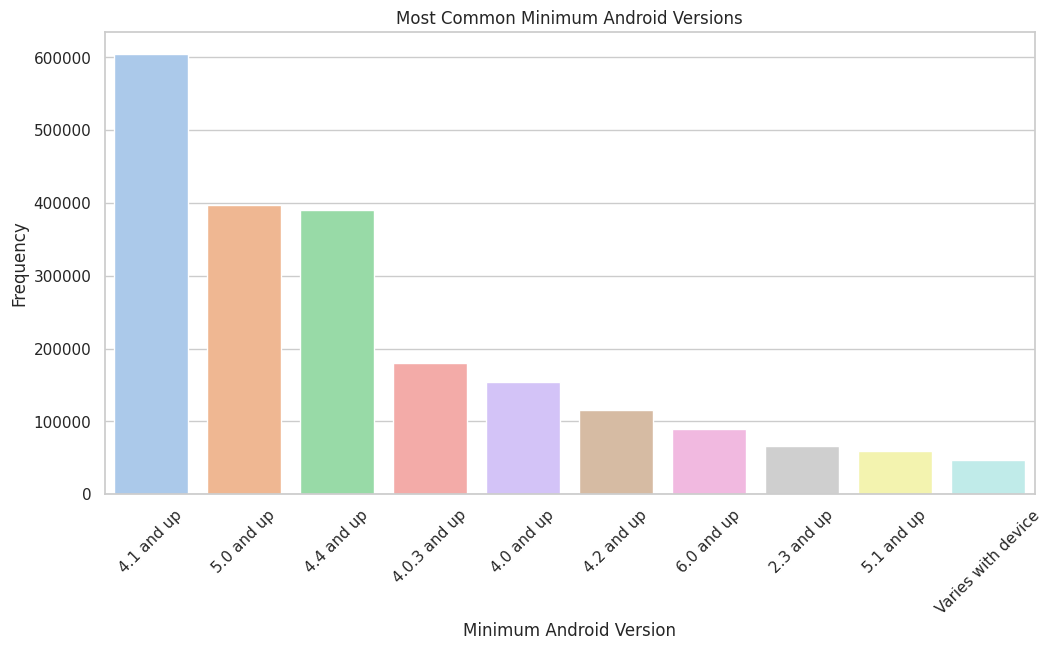

In [45]:
# Create a bar plot for the most common minimum Android versions
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
ax = sns.barplot(x=min_android_df.index, y='Counts', data=min_android_df)
plt.title('Most Common Minimum Android Versions')
plt.xlabel('Minimum Android Version')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

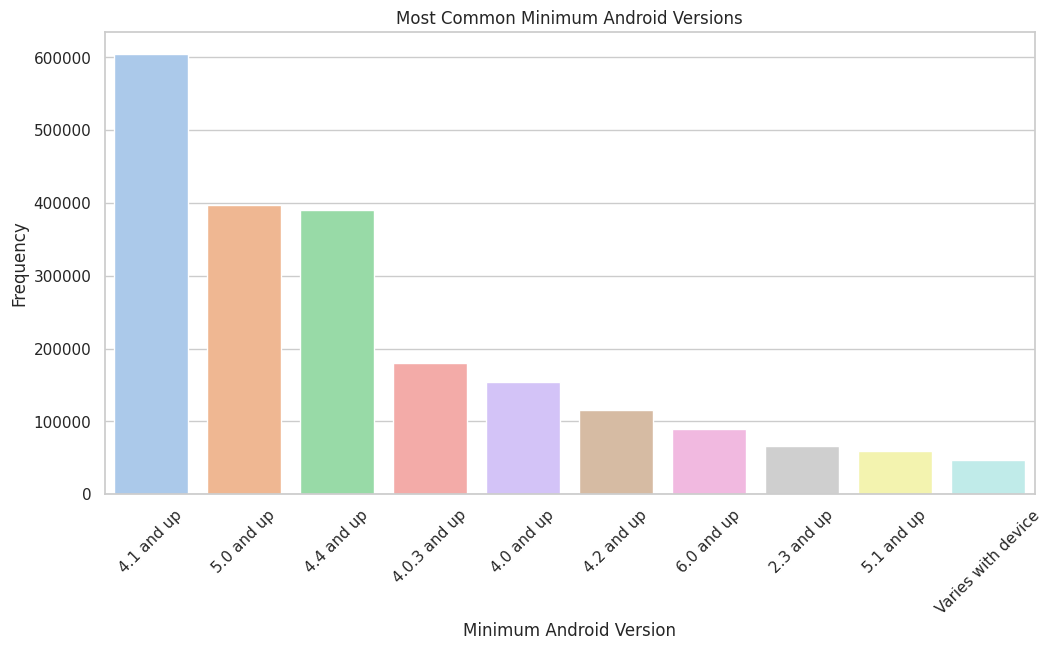

In [46]:
# Create a bar plot for the most common minimum Android versions
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
ax = sns.barplot(x=min_android_df.index, y='Counts', data=min_android_df)
plt.title('Most Common Minimum Android Versions')
plt.xlabel('Minimum Android Version')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Relationship between Ratings and Installs

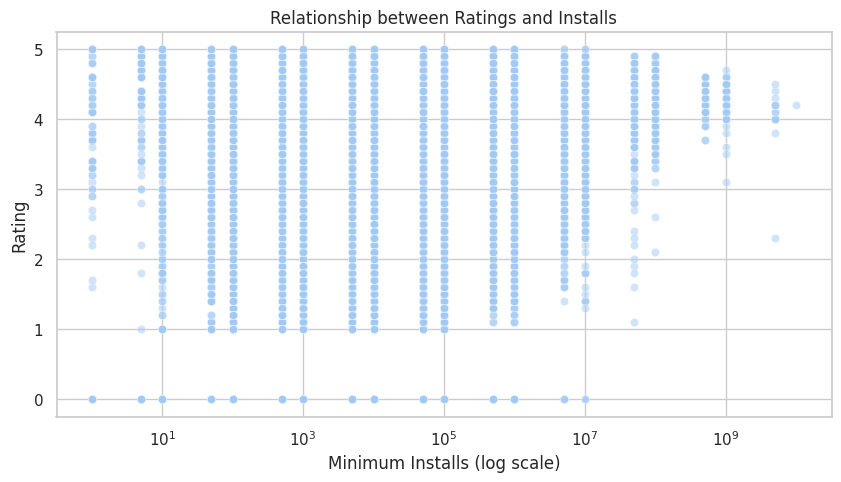

In [47]:
df['Installs_numeric'] = df['Minimum Installs'].apply(lambda x: int(x) if x == x else None)
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Installs_numeric', y='Rating', data=df, alpha=0.5)
plt.xscale('log')
plt.title('Relationship between Ratings and Installs')
plt.xlabel('Minimum Installs (log scale)')
plt.ylabel('Rating')
plt.show()

## Is there a relationship between app size and the number of installs?

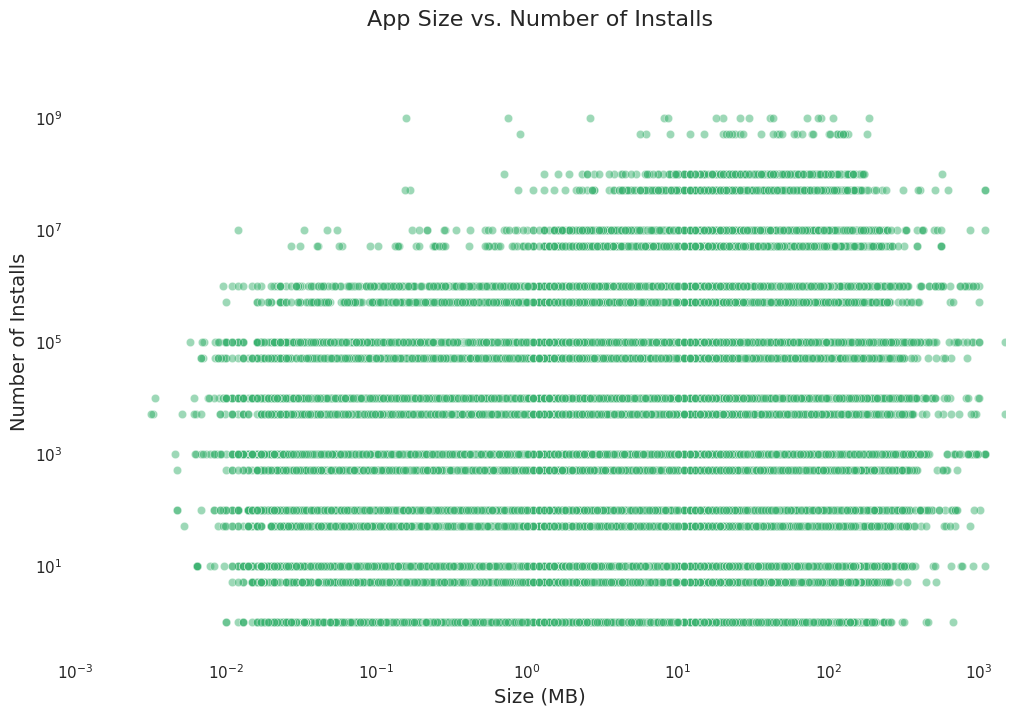

In [48]:

# Filter out rows with missing Size_MB or Installs_clean
filtered_data = df.dropna(subset=['Size', 'Installs_clean'])

# Set the color palette and minimal style
sns.set(style="white", palette="pastel")

# Create the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_data, x="Size", y="Installs_clean", alpha=0.5, color='mediumseagreen')

# Customize the plot
plt.title('App Size vs. Number of Installs', fontsize=16)
plt.xlabel('Size (MB)', fontsize=14)
plt.ylabel('Number of Installs', fontsize=14)
plt.xscale("log")
plt.yscale("log")
plt.xlim(0.001, filtered_data["Size"].max())

# Remove unnecessary plot elements
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


# Data Modelling

In [178]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## LinearRegression

In [179]:
data=df.copy()

In [180]:
# Clean up the 'Installs' column
data['Installs_clean'] = data['Installs'].str.replace('[^0-9]', '', regex=True).fillna(0).astype(int)

In [181]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# Select features and preprocess the dataset
selected_features = ['Category', 'Size', 'Installs_clean', 'Free', 'Price', 'Content Rating']
data_sample = data.sample(frac=0.1, random_state=42)
data_filtered = data_sample.dropna(subset=selected_features + ['Rating']).copy()

# One-hot encode categorical features
categorical_features = ['Category', 'Content Rating']
numerical_features = ['Size', 'Installs_clean', 'Price']

# Split the data into training and testing sets
X = data_filtered[selected_features]
y = data_filtered['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
# Create a pipeline with preprocessing and the Linear Regression model
model_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('linear_regression', LinearRegression())
])

In [183]:
# Train the Linear Regression model
model_lr.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")

Linear Regression - MSE: 4.25, R2: 0.04


## K-Nearest Neighbors

In [184]:
from sklearn.neighbors import KNeighborsRegressor

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with preprocessing and the KNeighborsRegressor model
model_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('kneighbors', KNeighborsRegressor(n_neighbors=5))
])

In [185]:
# Train the KNeighborsRegressor model
model_knn.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_knn = model_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors - MSE: {mse_knn:.2f}, R2: {r2_knn:.2f}')

K-Nearest Neighbors - MSE: 3.10, R2: 0.30


## DecisionTreeRegressor

In [186]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.inspection import permutation_importance

data_sample = data.sample(frac=0.1, random_state=42)

selected_features = ['Category', 'Rating Count', 'Size', 'Installs_clean', 'Free', 'Price', 'Content Rating']
data_filtered = data_sample.dropna(subset=selected_features + ['Rating']).copy()

# One-hot encode categorical features
categorical_features = ['Category', 'Content Rating']
data_features_encoded = pd.get_dummies(data_filtered[selected_features], columns=categorical_features)

# Split the dataset into training and testing sets
X = data_features_encoded
y = data_filtered['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [187]:
# Create and train the DecisionTree model
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_dtr = model_dtr.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)
print(f"DecisionTreeRegressor - MSE: {mse_dtr:.2f}, R2: {r2_rf:.2f}")

DecisionTreeRegressor - MSE: 0.41, R2: 0.94


## RandomForest model

In [188]:
from sklearn.ensemble import RandomForestRegressor

In [189]:
# Create and train the RandomForest model
model_rf = RandomForestRegressor(n_estimators=10, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")

Random Forest - MSE: 0.26, R2: 0.94


# Predicting the App rating

In [190]:
new=X_test.iloc[1:2,:]

In [191]:
 model_rf.predict(new)

array([4.33])

In [192]:
X_test.iloc[1:2,:]

,Rating Count,Size,Installs_clean,Free,Price,Category_Action,Category_Adventure,Category_Arcade,Category_Art & Design,Category_Auto & Vehicles,...,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
2239666,20.0,18.0,1000,True,0.0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [193]:
y_test[1:2]

2239666    4.2
Name: Rating, dtype: float64